Indentical quadrants allow unrestricted access to trace out the same paths. Attempting to analyze these paths to look for allocentric vs egocentric navigation strategies.

Potential reward nodes (egocentric view point):
* North-West quadrant: node 73
* South-West quadrant: node 105
* North-East quadrant: node 84

Potential reward nodes (allocentric view point):
* North-West quadrant: node 68
* South-West quadrant: node 100
* North-East quadrant: node 84

In [1]:
# import packages
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src')
outdata_path = '../outdata/'
sys.path.append(outdata_path)

from parameters import *
from MM_Traj_Utils import LoadTrajFromPath

# define constants
numQuad = 4
numQuad_EndNode = 4 * numQuad
QUADS = [quad1, quad2, quad3, quad4]

# Compile list of end nodes
NODES = []
for quad in QUADS:
    NODES.append(np.sort(list(set.intersection(set(lvl6_nodes), set(quad)))))

In [2]:
def tally_quad_EndNode(expSTART, expEND):
    # Initialize values
    quad_end_node = np.zeros((numQuad, numQuad_EndNode, len(RewNames)))

    # Tally end node visits
    for mouseID, nickname in enumerate(RewNames):
        tf = LoadTrajFromPath(outdata_path + nickname + '-tf')
        for bout in tf.no[:]: # [expSTART:expEND]
            for quadID,quad in enumerate(QUADS):
                # Count frequency of each end node visited in the quadrant for the current bout
                for nodeID,node in enumerate(NODES[quadID]):
                    quad_end_node[quadID, nodeID, mouseID] += len(np.where(bout==node)[0])

        # Normalize visit frequency for each mouse
        for quadID,quad in enumerate([quad1, quad2, quad3, quad4]):
            quad_end_node[quadID, :, mouseID] /= np.sum(quad_end_node[quadID, :, mouseID])

    return quad_end_node

In [ ]:
# Plot results for an individual mouse
mouseID = 0
fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(12,5))
for quadID in np.arange(numQuad):
    i = quadID//2
    j = quadID%2
    xticks = np.arange(numQuad_EndNode)
    axs[i,j].plot(xticks, quad_end_node[quadID, :, mouseID], '*')
    axs[i,j].set_xticks(ticks=xticks)
    axs[i,j].set_xticklabels(labels=NODES[quadID])
    axs[i,j].set_xlabel('End Nodes')
    axs[i,j].set_ylabel('Visit Frequency')
    axs[i,j].set_title('Quadrant %i' %(quadID+1))
fig.suptitle('Visit Frequency for Mouse: %s' %(RewNames[mouseID]))

Text(0.5, 0.98, 'Average visit frequency across all mice')

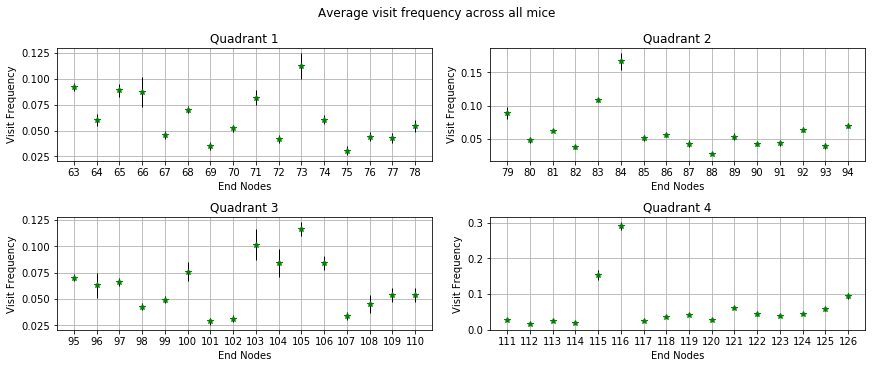

In [19]:
# Plot average results over all mice
quad_end_node = tally_quad_EndNode(0,0)
AVG_quad_end_node = np.mean(quad_end_node, axis=2)
STD_quad_end_node = np.std(quad_end_node, axis=2)
STD_ERR = STD_quad_end_node/np.sqrt(len(RewNames))

fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(12,5))
for quadID in np.arange(numQuad):
    i = quadID//2
    j = quadID%2
    xticks = np.arange(numQuad_EndNode)
    axs[i,j].errorbar(xticks, AVG_quad_end_node[quadID, :], fmt='*g', yerr=STD_ERR[quadID, :], ecolor='k', elinewidth=1)
    axs[i,j].set_xticks(ticks=xticks)
    axs[i,j].set_xticklabels(labels=NODES[quadID])
    axs[i,j].set_xlabel('End Nodes')
    axs[i,j].set_ylabel('Visit Frequency')
    axs[i,j].set_title('Quadrant %i' %(quadID+1))
    axs[i,j].grid()
fig.suptitle('Average visit frequency across all mice')